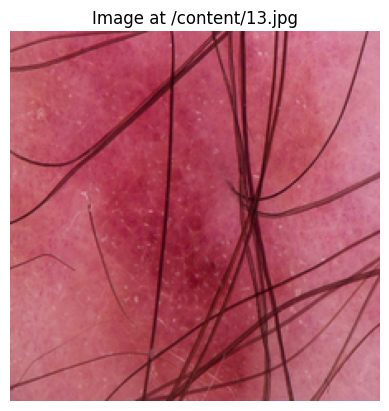

In [8]:
import cv2
from matplotlib import pyplot as plt

# Path to the image
image_path = "/content/13.jpg"

# Read the image
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (since OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.title("Image at /content/13.jpg")
plt.axis('off')  # Hide the axis
plt.show()


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

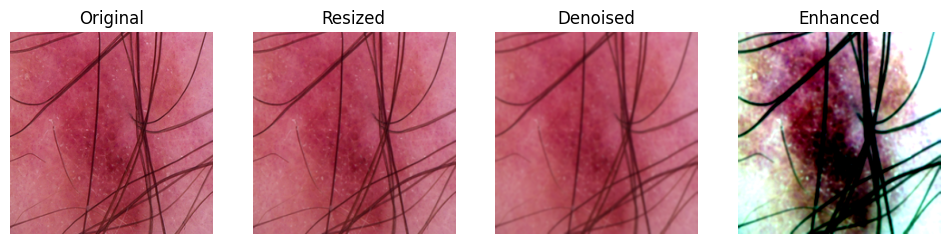

In [10]:
# Load the image from the specified path
image_path = "/content/13.jpg"  # Update this path if necessary
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image from the specified path.")
else:
    # Function to resize the image
    def resize_image(image, size=(256, 256)):
        resized_image = cv2.resize(image, size)
        return resized_image

    # Function to remove noise using Gaussian blur
    def noise_removal(image):
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
        return denoised_image

    # Function for image enhancement using mean and standard deviation
    def image_enhancement(image):
        # Calculate mean and standard deviation of the image
        mean, std_dev = cv2.meanStdDev(image)

        # Reshape mean and standard deviation to match the image channels
        mean = mean.reshape((1, 1, 3))
        std_dev = std_dev.reshape((1, 1, 3))

        # Enhance the image by adjusting contrast based on mean and standard deviation
        enhanced_image = (image - mean) / (std_dev + 1e-8) * 128 + 128

        # Clip values to the range [0, 255] and convert to unsigned 8-bit integer type
        enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)
        return enhanced_image

    # Apply the image processing steps
    resized_image = resize_image(image)
    denoised_image = noise_removal(resized_image)
    enhanced_image = image_enhancement(denoised_image)

    # Display the original and processed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 4, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
    plt.axis('off')
    plt.subplot(1, 4, 2), plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)), plt.title('Resized')
    plt.axis('off')
    plt.subplot(1, 4, 3), plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)), plt.title('Denoised')
    plt.axis('off')
    plt.subplot(1, 4, 4), plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB)), plt.title('Enhanced')
    plt.axis('off')
    plt.show()

In [11]:
from skimage import feature, color
from skimage.feature import graycomatrix, graycoprops

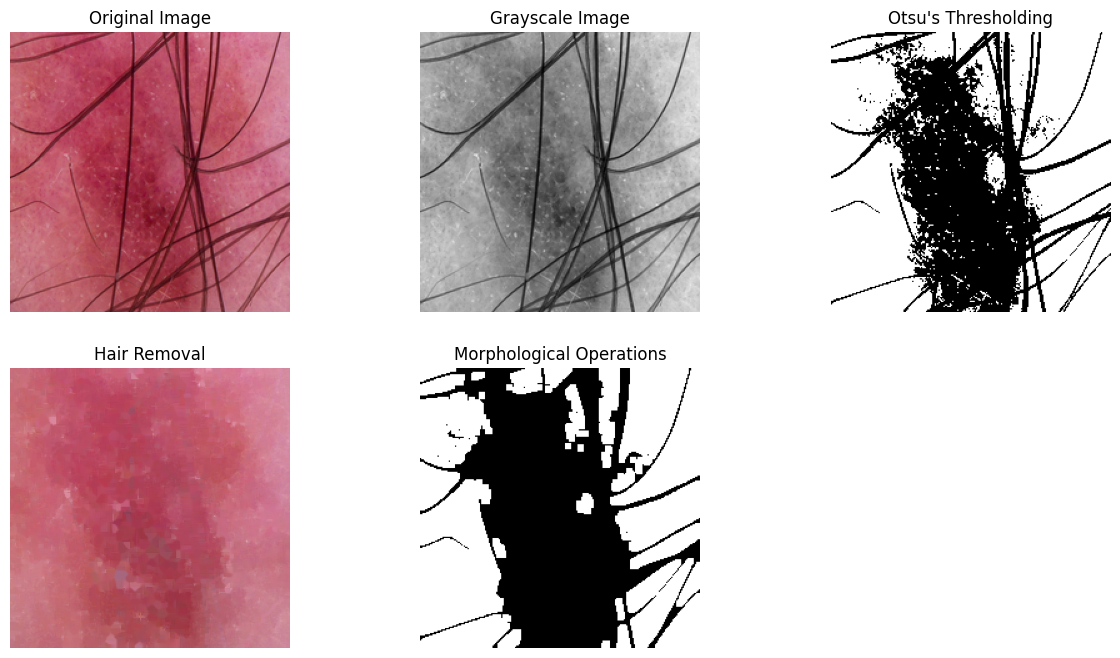

GLCM Features: [649.4493232224396, 16.268550228310502, 0.10109092935637337, 0.015145036512327101, 0.6376431439390157, 0.00022937213095972108]
First 10 HOG Features: [0.08467115 0.05758457 0.31345117 0.31345117 0.24523189 0.04552718
 0.04266008 0.05408314 0.0573044  0.07997646]
Color Features (Mean, Std): [96.48824139030611, 79.72785794005101, 175.3896484375, 32.073459639797655, 30.830698103596298, 30.59472582902259]
Combined Features: [649.4493232224396, 16.268550228310502, 0.10109092935637337, 0.015145036512327101, 0.6376431439390157, 0.00022937213095972108, 0.0846711534612077, 0.057584566484713204, 0.31345116582963883, 0.31345116582963883, 0.24523189496329043, 0.045527178688779556, 0.042660075265592984, 0.05408314453659719, 0.057304400578751885, 0.07997645540216496, 96.48824139030611, 79.72785794005101, 175.3896484375, 32.073459639797655, 30.830698103596298, 30.59472582902259]


In [12]:

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image from the specified path.")
else:
    # Function to convert RGB image to Grayscale
    def rgb_to_gray(image):
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return gray_image

    # Function to apply OTSU's Thresholding
    def otsu_thresholding(image):
        _, thresh_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return thresh_image

    # Function to remove hair from the image using morphological operations
    def hair_removal(image):
        gray_image = rgb_to_gray(image)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 17))
        blackhat = cv2.morphologyEx(gray_image, cv2.MORPH_BLACKHAT, kernel)
        _, binary_mask = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)
        inpainted_image = cv2.inpaint(image, binary_mask, 1, cv2.INPAINT_TELEA)
        return inpainted_image

    # Function for morphological operations in image segmentation
    def morphological_operations(image):
        kernel = np.ones((5, 5), np.uint8)
        opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
        return opened_image

    # Function to extract GLCM features
    def extract_glcm_features(gray_image):
        glcm = graycomatrix(gray_image, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]
        asm = graycoprops(glcm, 'ASM')[0, 0]
        return [contrast, dissimilarity, homogeneity, energy, correlation, asm]

    # Function to extract HOG features
    def extract_hog_features(gray_image):
        # Extract HOG features without multichannel argument
        hog_features, hog_image = feature.hog(gray_image, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
        return hog_features

    # Function to extract color features (mean and standard deviation of RGB channels)
    def extract_color_features(image):
        mean_colors = cv2.mean(image)[:3]
        std_colors = np.std(image, axis=(0, 1))
        return list(mean_colors) + list(std_colors)

    # Apply the image processing steps
    gray_image = rgb_to_gray(image)
    otsu_image = otsu_thresholding(gray_image)
    hairless_image = hair_removal(image)
    morphed_image = morphological_operations(otsu_image)

    # Extract features
    glcm_features = extract_glcm_features(gray_image)
    hog_features = extract_hog_features(gray_image)
    color_features = extract_color_features(image)

    # Combine all extracted features
    combined_features = glcm_features + list(hog_features)[:10] + color_features  # Limiting HOG to first 10 features for brevity

    # Display the processing steps and results
    plt.figure(figsize=(15, 8))
    plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.axis('off')
    plt.subplot(2, 3, 2), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale Image')
    plt.axis('off')
    plt.subplot(2, 3, 3), plt.imshow(otsu_image, cmap='gray'), plt.title("Otsu's Thresholding")
    plt.axis('off')
    plt.subplot(2, 3, 4), plt.imshow(cv2.cvtColor(hairless_image, cv2.COLOR_BGR2RGB)), plt.title('Hair Removal')
    plt.axis('off')
    plt.subplot(2, 3, 5), plt.imshow(morphed_image, cmap='gray'), plt.title('Morphological Operations')
    plt.axis('off')
    plt.show()

    # Print extracted features
    print("GLCM Features:", glcm_features)
    print("First 10 HOG Features:", hog_features[:10])
    print("Color Features (Mean, Std):", color_features)
    print("Combined Features:", combined_features)
